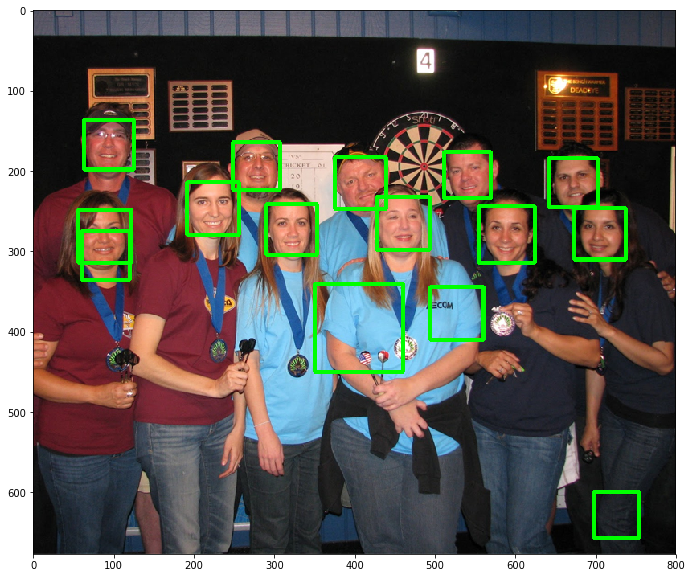

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (20,10)

def imshow(image):
    #OpenCV stores images in BGR so we have to convert to RGB to display it using matplotlib
    imagergb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(imagergb)
    plt.show()

face_classifier = cv2.CascadeClassifier('frontalface.xml')
# face_classifier = cv2.CascadeClassifier('./Haarcascades/haarcascade_frontalface_default.xml')

image = cv2.imread('../images/dart5.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.1, 1, 0, (50,50), (500,500))


if faces is ():
    print('No faces found')
    
#'''
# Draw box by iteration
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 3)
    #detected = cv2.imshow('Face Detection', image) 
    #cv2.waitKey(0)
#'''    
imshow(image)
